Nolearn Tutorial (toy example)
====
본 튜토리얼은 [다음 lasagne 예제](https://github.com/craffel/Lasagne-tutorial/blob/master/examples/tutorial.ipynb) 문서와 [다음 nolearn 예제](http://nbviewer.ipython.org/github/dnouri/nolearn/blob/master/docs/notebooks/CNN_tutorial.ipynb)를 기반으로 작성되었으며, 최신(2015년 09월 04일)의 master branch에서 동작하도록 수정되었음.
(내용이해를 돕기위해 간략하게 번역 및 각색하여 오역이나 오류가 있을 수 있음.)

## Toy example
* 다음은 2차원의 3개 군집을 갖는 점들을 구분하는 standard multi-layer perceptron을 학습하는 예제이다.

### 예제 데이터 생성
* 2차원의 3개의 군집을 갖는 데이터를 생성한다.

In [1]:
import theano
import sklearn.datasets
# Generate synthetic data
N_CLASSES = 3
X, y = sklearn.datasets.make_classification(n_features=2, n_redundant=0,
                                            n_classes=N_CLASSES, n_clusters_per_class=1)
# Convert to theano floatX
X = X.astype(theano.config.floatX)
# Labels should be ints
y = y.astype('int32')

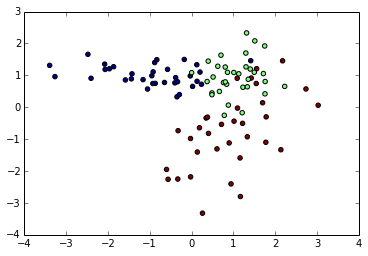

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# Make a scatter plot where color encodes class
plt.scatter(X[:, 0], X[:, 1], c=y)

### layers
lasagne는 일반적으로 Layer인스턴스를 쌓아서 네트워크를 만든다. lasagne의 Layer는 neural network에서 일반적으로 사용되는 기능을을 구현해 놓았고, layer에 있는 파라메터는 Theano를 사용해 계산한다.

#### InputLayer
InputLayer는 실제 입력 데이터(observed data)를 넣을 수 있는 레이어이다.

#### DenseLayer
DenseLayers는 neural network의 기본 형태의 Layer이다.
인풋값인 $x$ 에 웨이트 매트릭스 $W$ 와 바이어스 벡터 $b$ 를 연산하고 nonlinearity 함수인 $\\sigma$ 를 수행한다. ($\\sigma(Wx + b)$)
> fullconnect layer라고도 한다.


### NeuralNet
* classification을 위한 Network & parameter 셋업

#### training (under-fitting)

In [3]:
from lasagne.layers import *
from lasagne.nonlinearities import *
layers = [
    (InputLayer, {'shape': X.shape}),
    (DenseLayer, {'num_units': 1, 'nonlinearity': tanh} ),
    (DenseLayer, {'num_units': N_CLASSES, 'nonlinearity': softmax} ),
]

In [4]:
from nolearn.lasagne import NeuralNet
from lasagne.objectives import *
from lasagne.updates import *

net = NeuralNet(
    layers=layers,
    max_epochs = 10,
    
    update=sgd,
    update_learning_rate=1,
    
    verbose=1,
)

In [5]:
_ = net.fit(X, y)

# Neural Network with 9 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input0       2
  1  dense1       1
  2  dense2       3

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.33137       1.05645      1.26024      0.52381  0.00s
      2       1.07535       0.93679      1.14790      0.52381  0.00s
      3       0.93089       0.87441      1.06459      0.57143  0.00s
      4       0.85046       0.83861      1.01412      0.57143  0.00s
      5       0.80211       0.81452      0.98477      0.57143  0.00s
      6       0.76974       0.79609      0.96690      0.57143  0.00s
      7       0.74615       0.78062      0.95585      0.57143  0.00s
      8       0.72787       0.76653      0.94956      0.61905  0.00s
      9       0.71286       0.75269      0.94708      0.61905  0.00s
     10       0.69981       0.73829      0.94789      0.71429  0.00s


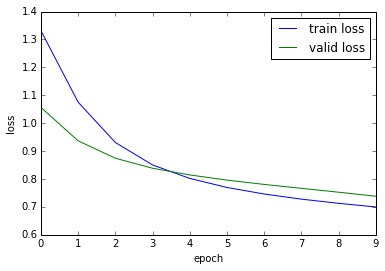

In [6]:
from nolearn.lasagne.visualize import plot_loss
plot_loss(net)

#### evaluation

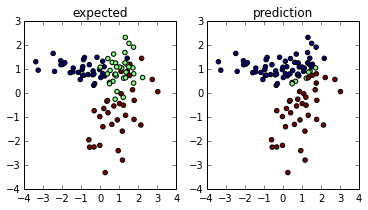

In [7]:
y_hat = net.predict(X)

figs, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title("expected")
axes[1].scatter(X[:, 0], X[:, 1], c=y_hat)
axes[1].set_title("prediction")

#### training (over-fitting)

In [8]:
from lasagne.layers import *
from lasagne.nonlinearities import *
layers = [
    (InputLayer, {'shape': X.shape}),
    (DenseLayer, {'num_units': 1000, 'nonlinearity': tanh} ),
    (DenseLayer, {'num_units': N_CLASSES, 'nonlinearity': softmax} ),
]

In [9]:
from nolearn.lasagne import NeuralNet
from lasagne.objectives import *
from lasagne.updates import *

net = NeuralNet(
    layers=layers,
    max_epochs = 10,
    
    update=sgd,
    update_learning_rate=1,
    
    verbose=1,
)

In [10]:
_ = net.fit(X, y)

# Neural Network with 6003 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input0       2
  1  dense1    1000
  2  dense2       3

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.03686       0.56250      1.84330      0.76190  0.00s
      2       0.43925       0.45848      0.95806      0.80952  0.00s
      3       0.39982       0.51285      0.77960      0.80952  0.00s
      4       0.38133       0.43804      0.87054      0.85714  0.00s
      5       0.36124       0.47511      0.76033      0.80952  0.00s
      6       0.35040       0.43491      0.80568      0.85714  0.00s
      7       0.34292       0.45790      0.74891      0.80952  0.00s
      8       0.33807       0.43712      0.77339      0.85714  0.00s
      9       0.33463       0.44994      0.74371      0.80952  0.00s
     10       0.33207       0.43936      0.75580      0.85714  0.00s


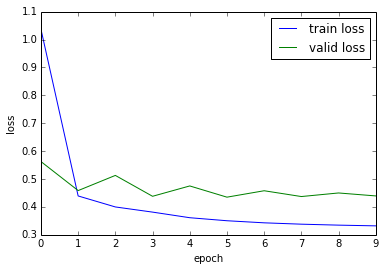

In [11]:
from nolearn.lasagne.visualize import plot_loss
plot_loss(net)

#### evaluation

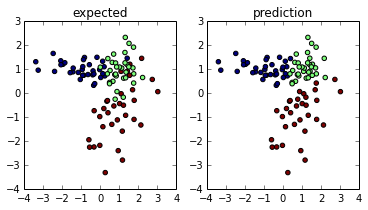

In [12]:
y_hat = net.predict(X)

figs, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title("expected")
axes[1].scatter(X[:, 0], X[:, 1], c=y_hat)
axes[1].set_title("prediction")

### Model Complexity
![](http://www.frank-dieterle.de/phd/images/image024.gif)

#### training (optimum)

In [13]:
from lasagne.layers import *
from lasagne.nonlinearities import *
layers = [
    (InputLayer, {'shape': X.shape}),
    (DenseLayer, {'num_units': 10, 'nonlinearity': tanh} ),
    (DenseLayer, {'num_units': N_CLASSES, 'nonlinearity': softmax} ),
]

In [14]:
from nolearn.lasagne import NeuralNet
from lasagne.objectives import *
from lasagne.updates import *

net = NeuralNet(
    layers=layers,
    max_epochs = 10,
    
    update=sgd,
    update_learning_rate=1,
    
    verbose=1,
)

In [15]:
_ = net.fit(X, y)

# Neural Network with 63 learnable parameters

## Layer information

  #  name      size
---  ------  ------
  0  input0       2
  1  dense1      10
  2  dense2       3

  epoch    train loss    valid loss    train/val    valid acc  dur
-------  ------------  ------------  -----------  -----------  -----
      1       1.07953       0.69361      1.55640      0.76190  0.00s
      2       0.64835       0.57929      1.11921      0.76190  0.00s
      3       0.52345       0.52666      0.99390      0.76190  0.00s
      4       0.46153       0.49655      0.92948      0.80952  0.00s
      5       0.42569       0.47802      0.89052      0.85714  0.00s
      6       0.40249       0.46543      0.86477      0.85714  0.00s
      7       0.38611       0.45636      0.84606      0.85714  0.00s
      8       0.37375       0.44954      0.83142      0.85714  0.00s
      9       0.36397       0.44424      0.81930      0.85714  0.00s
     10       0.35593       0.44002      0.80888      0.85714  0.00s


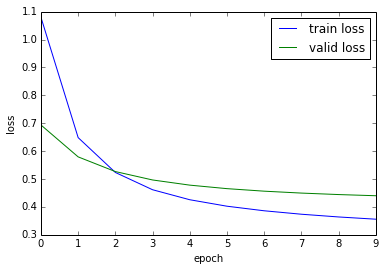

In [16]:
from nolearn.lasagne.visualize import plot_loss
plot_loss(net)

#### evaluation

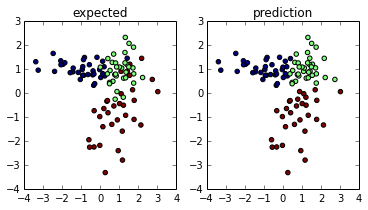

In [17]:
y_hat = net.predict(X)

figs, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title("expected")
axes[1].scatter(X[:, 0], X[:, 1], c=y_hat)
axes[1].set_title("prediction")

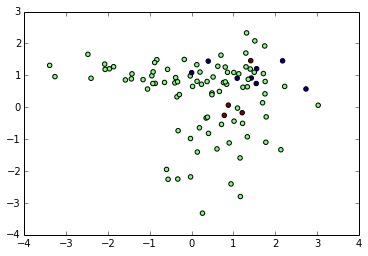

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y_hat-y)